# 09. 행 축소와 LU 분해

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sympy as sym

import scipy.linalg

import matplotlib.gridspec as gridspec

import matplotlib_inline.backend_inline
plt.rcParams.update({'font.size':14}) # set global font size

<br>

## 09.01. 연립방정식

- 두 개의 방정식을 가진 연립방정식

$$x = 4-y$$
$$y=x/2 + 2$$

$$\downarrow$$

$$x+2y = 4-y+(x+4)$$
$$y-x = x/2+2-(4-y)$$

$$\downarrow$$

$$2y = 8-y$$
$$-2/3 x = -2$$

$$\downarrow$$

$$x = 4/3,\;\;\;y = 8/3$$

<br>

### 연립방정식을 행렬로 변환
- 상수 (constant) : 변수에 결합되지 않은 숫자 (절편, intercept, 변위, offset)
- 계수 : 변수에 결합되는 숫자

$$x+y = 4$$
$$-x/2 + y =2$$

$$\downarrow$$


$$\begin{bmatrix} 1&1\\-1/2&1\end{bmatrix} \begin{bmatrix}x\\y \end{bmatrix} = \begin{bmatrix} 4\\2\end{bmatrix}$$

$$\downarrow$$

$$Ax = b$$

<br>

### 행렬 방정식 다루기
- 행렬 곱셈에서 곱하는 방향을 같은 방향으로 맞추어야함

$$Ax = b$$
$$v + Ax =v + b$$
$$(v + Ax)^T = (v+b)^T$$

<br>

## 09.02. 행 축소

<br>

### 행 축소 (row reduction)
- 행에 스칼라 곱셈과 덧셈이라는 두 가지 연산을 반복적으로 적용하는 작업
- 하나의 연립방정식 내에서 하나의 방정식을 다른 방저식에 더하는 것과 동일한 원리를 사용
- **행 축소의 목표는 밀집 행렬을 상삼각 행렬로 변환하는 것**
    - **행 축소의 결과인 상삼각 행렬은 '행렬의 사다리꼴 형태'**
- **행 축소 후의 행렬의 모습은, 행 축소 전의 행렬과 다르지만, 두 행렬은 선형 변환으로 연결**
    
<br>

- **특정 행렬과 관련된 사다리꼴 행렬의 개수는 고유하지 않으며 무한함**

    $\rightarrow$ **무한히 가능한 사다리꼴 형태보다 두 가지 형태의 사다리꼴 행렬이 선호**
    
    **이 두 가지 형태는 몇 가지 제약조건이 추가되어 고유하며, 기약 행 사다리꼴 형태 (reduced row echelon form)과 LU 분해의 U**

<br>

#### 사다리꼴 형태
- **각 행에서 가장 왼쪽에 있는 0이 아닌 숫자 (기준 원소, pivot)**가 위 행의 기준 원소 오른쪽에 있고,

    모든 원소가 0인 행은 0이 아닌 원소를 포함한 행 아래에 있음

<br>

#### 예시)
- 첫 번째 행을 두 번째 행에 더해 -1을 제거
$$\begin{bmatrix} 2&3\\-2&2\end{bmatrix} \rightarrow \begin{bmatrix} 2&3\\0&5\end{bmatrix}$$

- 변형 전과 변형 후는 선형 변환으로 연결

$$\begin{bmatrix} 1&0\\1&1\end{bmatrix} \begin{bmatrix} 2&3\\-2&2\end{bmatrix} = \begin{bmatrix} 2&3\\0&5\end{bmatrix}$$

$$\downarrow$$

$$L^{-1}A = U$$

<br>

### 가우스 소거법 (Gaussian elimination)
1. **계수 행렬을 상수벡터로 증강**
2. **증강된 행렬을 사다리꼴 형태로 축소**
2.  **역치환을 사용하여 각 변수를 차례로 품**



<br>

#### 예시
- 연립방정식을 행렬 방정식으로 변환

$$y=4-y$$
$$x = x/2 +2$$

$$\downarrow$$

$$\begin{bmatrix} 1&1\\-1/2&1\end{bmatrix} \begin{bmatrix}x\\y \end{bmatrix} = \begin{bmatrix} 4\\2\end{bmatrix}$$



- 계수 행렬을 상수벡터로 증강

$$\begin{bmatrix} 1&1&4\\-1/2&1&2 \end{bmatrix} $$


- 증강된 행렬의 행을 축소


$$\begin{bmatrix} 1&1&4\\-1/2&1&2 \end{bmatrix} \rightarrow \begin{bmatrix} 1&1&4\\0&2/3&4 \end{bmatrix} $$


- 축소된 증강 행렬을 연립방정식으로 계산

$$x+y=4$$
$$3/2y = 4$$

- $y = 8/3$을 풀고 난 후, 첫 번째 방정식의 $y$에 대입하고 $x$를 계산 = **역치환 (back substitution)**

<br>

### 가우스-조던 소거법
- 사다리꼴 행렬이 완성되면, 각 행을 기준 원소로 나눔
    - 가장 왼쪽이 이미 1인 행은 건너 뜀

$$\begin{bmatrix} 1&1&4\\0&2/3&4 \end{bmatrix}$$

$$\downarrow$$

$$\begin{bmatrix} 1&1&4\\0&1&8/3 \end{bmatrix}$$

- 각 기준 원소 위의 모든 원소를 제거하기 위해, 행을 위쪽으로 줄여 나감

    **즉, 해당 열에 0이 아닌 숫자가 기준 원소뿐인 사다리꼴을 생성 $\rightarrow$ RREF**
    
$$\begin{bmatrix} 1&1&4\\0&1&8/3 \end{bmatrix} \rightarrow \begin{bmatrix} 1&0&4/3\\0&1&8/3 \end{bmatrix}$$

$$\downarrow$$

$$x = 4/3\;\;\;\; y=8/3$$

<br>

#### RREF 
- **항상 행렬의 왼쪽 상단에 단위 행렬을 부분 행렬로 생성**
- **행렬마다 정확히 하나의 RREF만 존재 (고유성)**

<br>

#### `sympy.Matrix()`

In [15]:
M = np.array([ [1,1,4],[-1/2,1,2] ])

In [16]:
symMat = sym.Matrix(M)
print(symMat)

Matrix([[1.00000000000000, 1.00000000000000, 4.00000000000000], [-0.500000000000000, 1.00000000000000, 2.00000000000000]])


In [17]:
symMat.rref()[0] 

Matrix([
[1, 0, 1.33333333333333],
[0, 1, 2.66666666666667]])

<br>

### 가우스-조던 소거법을 통한 역행렬 계산

$$rref([A|I]) \rightarrow [I|A^{-1}]$$

<br>

## 09.03. LU분해
- **행렬을 두 개의 삼각 행렬의 곱으로 분해**

$$A = LU$$


- 행 축소는 $L^{-1} A = U$로 표현할 수 있으며

    $L^{-1}$에는 밀집 행렬 $A$를 상삼각(사다리꼴) 행렬 $U$로 변환하는 행 변환 집합

<br>

- **LU 분해는 고유하지 않음**
    - 무한한 조합의 하삼각 행렬과 상삼각 행려을 곱하여 행렬 $A$를 생성할 수 있음
    - **하지만 $L$의 대각선이 1이라는 제약 조건을 추가하면, 최대계수 정방 행렬 $A$에 대해 LU 분해가 고유하다는 것을 보장할 수 있음**

<br>

#### `scipy.linalg.lu()`

In [18]:
A = np.array([ [2,2,4], [1,0,3], [2,1,2] ])

In [19]:
_,L,U = scipy.linalg.lu(A)

In [20]:
print('L: ')
print(L), print(' ')

print('U: ')
print(U), print(' ')

print('A - LU: ')
print(A - L@U) 

L: 
[[1.  0.  0. ]
 [0.5 1.  0. ]
 [1.  1.  1. ]]
 
U: 
[[ 2.  2.  4.]
 [ 0. -1.  1.]
 [ 0.  0. -3.]]
 
A - LU: 
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


<br>

#### LU 분해를 활용한 행렬식 계산
- **행렬식의 두 가지 속성**
1. 삼각 행렬의 행렬식은 대각선의 곱
2. 행렬 곱셈의 행렬식은 각 행렬식의 곱 $\;\;(det(AB)=det(A)det(B))$

<br>

- **따라서, 행렬식은 $L$의 대각선 곱에 $U$의 대각선 곱을 곱한 값으로 계산**
    - **$L$의 대각선이 모두 1이기 때문에, $A$의 행렬식은 단순히 $U$의 대각선의 곱**

In [41]:
M = 6
A = np.random.randn(M,M)

In [42]:
P,L,U = scipy.linalg.lu(A)

In [44]:
detLU = np.prod( np.diag(U) ) * np.linalg.det(P)

detNP = np.linalg.det(A)

print(detLU, detNP)
print(detLU-detNP)

4.209302430840365 4.2093024308403635
1.7763568394002505e-15


<br>

#### 계수-3의 $6\times 8$행렬 LU 분해

In [37]:
M = 6
N = 8
r = 3

A = np.random.randn(M,r) @ np.random.randn(r,N)

In [38]:
P,L,U = scipy.linalg.lu(A)

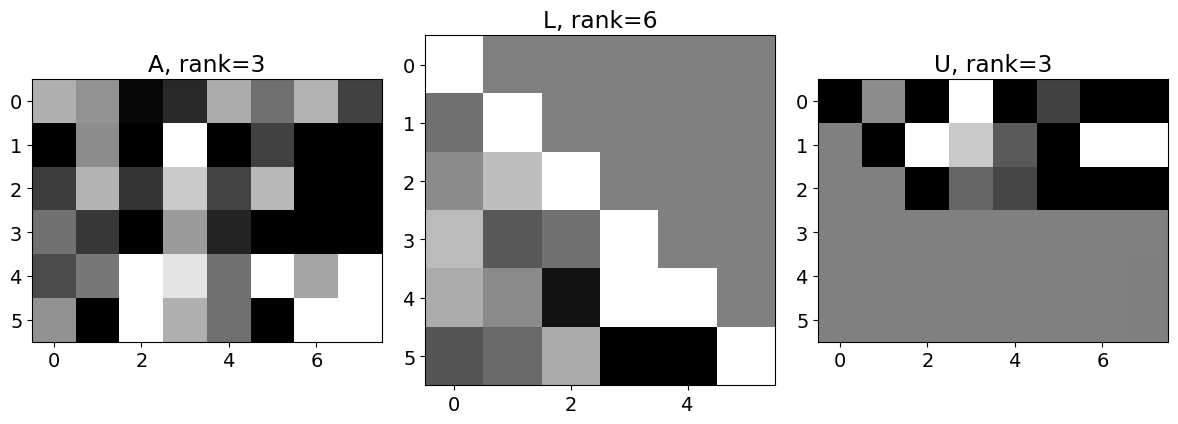

In [39]:
_,axs = plt.subplots(1,3,figsize=(12,7))

axs[0].imshow(A,vmin=-1,vmax=1,cmap='gray')
axs[0].set_title(f'A, rank={np.linalg.matrix_rank(A)}')

axs[1].imshow(L,vmin=-1,vmax=1,cmap='gray')
axs[1].set_title(f'L, rank={np.linalg.matrix_rank(L)}')

axs[2].imshow(U,vmin=-1,vmax=1,cmap='gray')
axs[2].set_title(f'U, rank={np.linalg.matrix_rank(U)}')

plt.tight_layout()
plt.show()

<br>

### 치환 행렬을 통한 행 교환
- 상삼각 형태로 변환되지 않은 행렬을, 행 교환을 통하여 상삼각 형태를 가질 수 있도록
    
    **치환 행렬 $P$을 곱함**
<br>

- 치환 행렬은 직교 행렬 ($P^T = P^{-1}$)
    - 임의의 두 열 사이의 내적은 0, 열 자체의 내적은 1

<br>

$$PA = LU$$

$$A = P^T LU$$

<br>

$$\begin{bmatrix} 3&2&1\\0&0&5\\0&7&2 \end{bmatrix}$$

$$\downarrow$$

$$\begin{bmatrix} 1&0&0\\0&0&1\\0&1&0 \end{bmatrix}  \begin{bmatrix} 3&2&1\\0&0&5\\0&7&2 \end{bmatrix} = \begin{bmatrix} 3&2&1\\0&7&2\\0&0&5 \end{bmatrix}$$

In [34]:
m = 4
n = 6

A = np.random.randn(m,n)

In [35]:
P,L,U = scipy.linalg.lu(A)

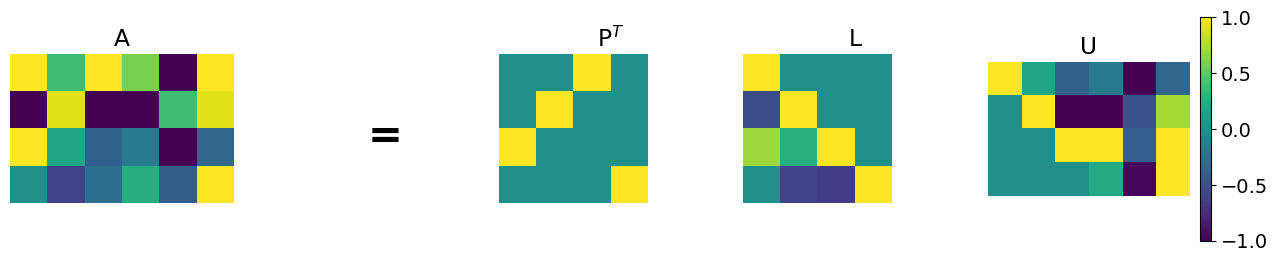

In [33]:
fig,axs = plt.subplots(1,5,figsize=(13,4))

axs[0].imshow(A,vmin=-1,vmax=1)
axs[0].set_title('A')

axs[1].imshow(np.ones((m,n)),cmap='gray',vmin=-1,vmax=1)
axs[1].text(n/2,m/2,'=',ha='center',fontsize=30,fontweight='bold')
# axs[1].axis('off')

axs[2].imshow(P.T,vmin=-1,vmax=1)
axs[2].set_title(r'P$^T$')

axs[3].imshow(L,vmin=-1,vmax=1)
axs[3].set_title('L')

h = axs[4].imshow(U,vmin=-1,vmax=1)
axs[4].set_title('U')

for a in axs:
  a.axis('off')
  a.set_xlim([-.5,n-.5])
  a.set_ylim([m-.5,-.5])


fig.colorbar(h,ax=axs[-1],fraction=.05)
plt.tight_layout()
plt.show()

<br>

#### LU 분해를 통한 역행렬

$$A = P^T LU$$

$$A^{-1} = (P^T LU)^{-1}$$

$$A^{-1} = U^{-1} L^{-1} P$$

In [51]:
m = 4
A = np.random.randn(m,m)

In [52]:
P,L,U = scipy.linalg.lu(A)

In [53]:
invViaLU = np.linalg.inv(U) @ np.linalg.inv(L) @ P

invViaInv = np.linalg.inv(A)

np.round( A@invViaLU ,10)

array([[ 1., -0., -0.,  0.],
       [ 0.,  1., -0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [-0.,  0.,  0.,  1.]])